# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk 
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from nltk.tokenize import sent_tokenize, word_tokenize

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\andre\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_k = os.getenv('news_api')


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi= NewsApiClient(api_key=api_k)


In [4]:
current_date = pd.Timestamp("2020-09-23", tz="America/New_york").isoformat()


In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')



In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')


In [7]:
bitcoin_list = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_list.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_df = pd.DataFrame(bitcoin_list)
bitcoin_df.head()

,compound,date,negative,neutral,positive,text
0,-0.6908,2020-09-10,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.2500,2020-09-24,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...
2,-0.5267,2020-09-22,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...
3,0.0000,2020-09-08,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
4,0.0000,2020-09-24,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa..."


In [9]:
ethereum_list = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_list.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [10]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_df = pd.DataFrame(ethereum_list)
ethereum_df.head()

,compound,date,negative,neutral,positive,text
0,0.000,2020-09-07,0.000,1.000,0.00,TL;DR: The Complete Stock and Cryptocurrency I...
1,0.000,2020-09-18,0.000,1.000,0.00,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
2,-0.296,2020-09-30,0.061,0.939,0.00,"September\r\n30, 2020\r\n8 min read\r\nOpinion..."
3,0.507,2020-10-02,0.000,0.910,0.09,Our robot colleague Satoshi Nakaboto writes ab...
4,0.000,2020-10-02,0.000,1.000,0.00,US President Donald Trump and First Lady Melan...


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.281175,0.014400,0.923850,0.061750
std,0.368322,0.044625,0.043245,0.041842
min,-0.690800,0.000000,0.840000,0.000000
25%,0.000000,0.000000,0.910000,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.916250,0.090000
max,0.507000,0.160000,1.000000,0.090000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.132294,0.032944,0.911500,0.055556
std,0.351136,0.045480,0.075989,0.064580
min,-0.659700,0.000000,0.766000,0.000000
25%,0.000000,0.000000,0.848750,0.000000
50%,0.113150,0.000000,0.929500,0.032500
75%,0.416600,0.059000,0.985250,0.092250
max,0.624900,0.162000,1.000000,0.198000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin has a higher compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()




In [14]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
nltk.download('stopwords')
print(stopwords.words('english'))
sw = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    text= text.lower()   
    # Remove the punctuation
    text= word_tokenize(text)    
    text = [word for word in text if word not in punctuation]
    # Remove the stop words
    text = [word for word in text if word not in sw]
    # Lemmatize Words into root words
    text = [lemmatizer.lemmatize(word) for word in text]

    return text


In [16]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens']=bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,date,negative,neutral,positive,text,tokens
0,-0.6908,2020-09-10,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.2500,2020-09-24,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
2,-0.5267,2020-09-22,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...,"[u, district, judge, sentenced, uk, national, ..."
3,0.0000,2020-09-08,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
4,0.0000,2020-09-24,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa...","[july, 15, first, another, day, parag, agrawal..."


In [17]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df['tokens']=ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,date,negative,neutral,positive,text,tokens
0,0.000,2020-09-07,0.000,1.000,0.00,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, dr, complete, stock, cryptocurrency, inve..."
1,0.000,2020-09-18,0.000,1.000,0.00,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, 18, 2020, 6, min, read, opinion, e..."
2,-0.296,2020-09-30,0.061,0.939,0.00,"September\r\n30, 2020\r\n8 min read\r\nOpinion...","[september, 30, 2020, 8, min, read, opinion, e..."
3,0.507,2020-10-02,0.000,0.910,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.000,2020-10-02,0.000,1.000,0.00,US President Donald Trump and First Lady Melan...,"[u, president, donald, trump, first, lady, mel..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitword_counts=Counter(ngrams(tokenizer(bitcoin_df['text'].str.cat()), n=2))
#print(dict(bitword_counts.most_common(20)))

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethword_counts=Counter(ngrams(tokenizer(ethereum_df['text'].str.cat()), n=2))
#print(dict(ethword_counts.most_common(20)))


In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitword_counts)

[(('satoshi', 'nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'welcome'), 13),
 (('welcome', 'another'), 13)]

In [23]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethword_counts)

[(('char', 'september'), 3),
 (('getty', 'image'), 3),
 (('min', 'read'), 2),
 (('read', 'opinion'), 2),
 (('opinion', 'expressed'), 2),
 (('expressed', 'entrepreneur'), 2),
 (('entrepreneur', 'contributor'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('chandler', 'guo'), 2),
 (('fiat', 'backed'), 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

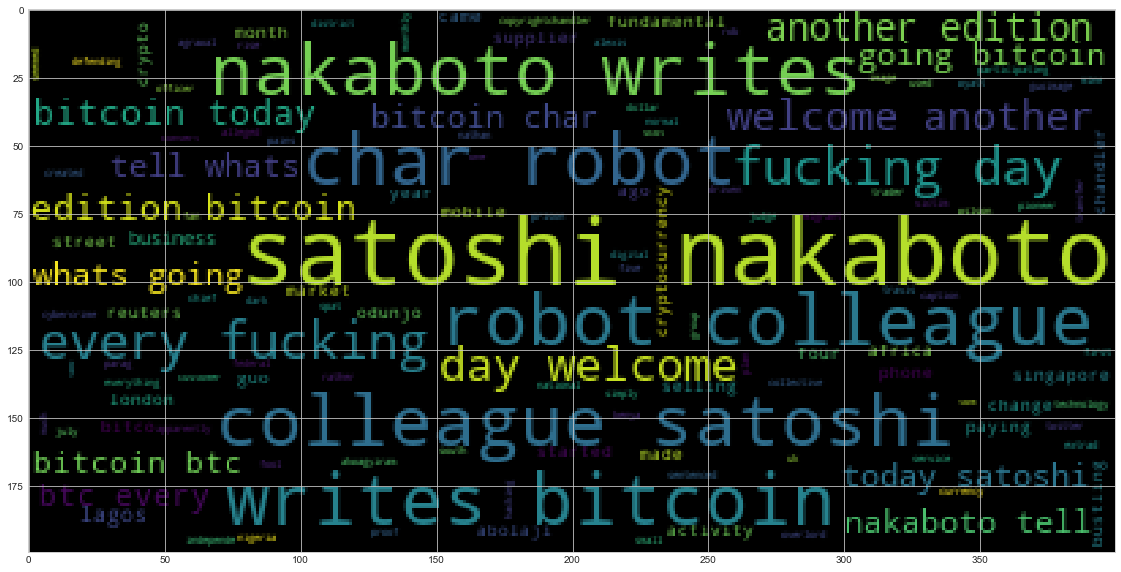

In [36]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_b = WordCloud().generate(' '.join(tokenizer(bitcoin_df['text'].str.cat())))
plt.imshow(wc_b)

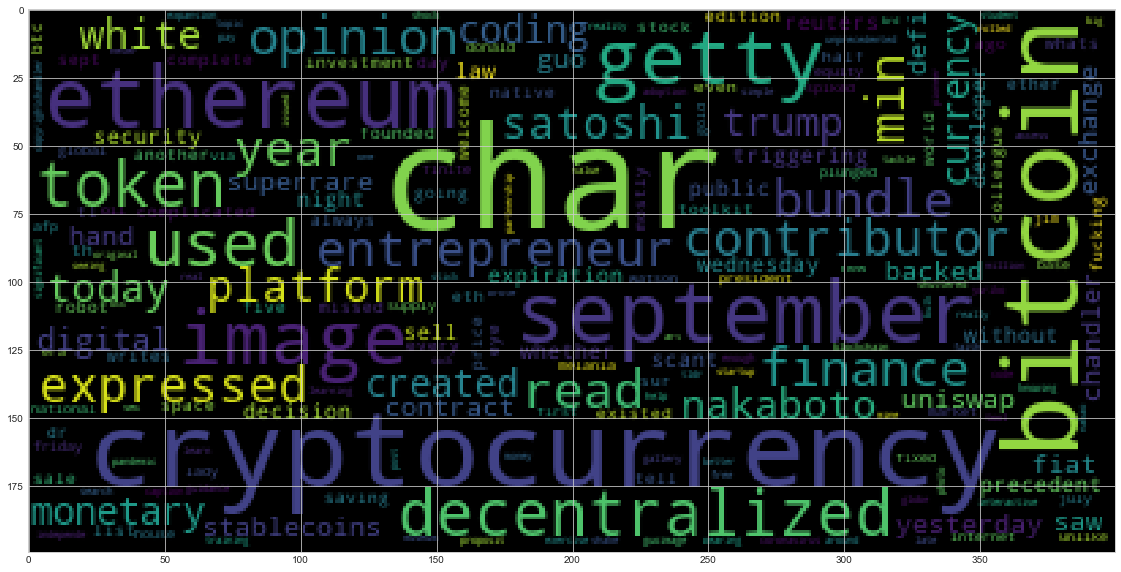

In [37]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_e = WordCloud().generate(' '.join(tokenizer(ethereum_df['text'].str.cat())))
plt.imshow(wc_e)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [44]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [52]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_text=' '.join(tokenizer(bitcoin_df['text'].str.cat()))


In [57]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
b_doc = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!

In [58]:
# Render the visualization
# YOUR CODE HERE!
#doc = nlp(article)
displacy.render(b_doc, style='ent')

In [63]:
# List all Entities
# YOUR CODE HERE!
bitcoin_entities = [ent.text for ent in b_doc.ents if ent.label_]
bitcoin_entities


['two',
 'singapore',
 '365,000',
 'singapore',
 'chandler guo',
 'one',
 'chandler guo pioneer',
 'u district',
 'uk',
 'five year',
 'nathan wyatt',
 'akwagyiram tom wilson',
 'monthly',
 'africa',
 '55 year',
 'south africa',
 'kenya',
 'july 15 first',
 'four month ago',
 'london',
 'four month ago',
 'bitcoin',
 'bitcoin',
 'today',
 'today',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today',
 'bitcoin',
 'bitcoin',
 'today']

---

## Ethereum NER

In [55]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_text= ' '.join(tokenizer(ethereum_df['text'].str.cat()))

In [59]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
e_doc = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!

In [60]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(e_doc, style='ent')

In [65]:
# List all Entities
# YOUR CODE HERE!
ethereum_entities=[ent.text for ent in e_doc.ents if ent.label_]
ethereum_entities

['29.46',
 'sept. 7',
 '97',
 'september 18 2020 6',
 'five year ago',
 'september 30 2020 8',
 'half',
 'bitcoin',
 'bitcoin',
 'today',
 'donald trump',
 'first',
 'white house',
 'july 7 2020',
 'jim watson',
 'friday',
 'bitcoin monetary base',
 'globe',
 'chandler guo',
 'one',
 'chandler guo pioneer',
 'sec',
 'fiat',
 'yesterday',
 'fiat',
 'yuriko nakao getty image',
 'yesterday',
 'today',
 '100 million',
 'deloitte kpmg fidelity',
 '100 milli',
 '400 uni',
 'september 1',
 'twenty dollar',
 'bitcoin',
 '458,000',
 'september 25',
 'alison frankel reuters',
 'u.s.',
 'wednesday',
 'u.s.',
 'wednesday',
 'u.s.',
 'alvin',
 'september 15 2020',
 'night',
 '9.6mm']